In [7]:
import pandas as pd
df = pd.read_csv('medical_equipments_data.csv')

In [18]:
df
#Has loaded the dataset
#let us first run some basic functions to know our data better 

,Machine ID,Serial No.,Product Name,Product Type,Usage Pattern,Age of Equipment (months),Operational Temperature,Humidity/Pressure,Exposure to Chemicals,Govt Approved Standards,Availability of Spare Parts,No. of Spare Parts,Service Maintenance (months)
0,MACH001,SN234567,Ultrasound Scanner,Type-1,High,12,22-26°C,40.0,No,Yes,Yes,25,8
1,MACH002,SN890123,Anesthesia Machine,Type-3,Low,48,18-22°C,35.0,Yes,Yes,Yes,30,9
2,MACH003,SN456789,Ventilator,Type-2,High,6,20-24°C,40.0,Yes,Yes,Yes,20,3
3,MACH004,SN012345,ECG Machine,Type-2,Moderate,14,22-26°C,40.0,No,Yes,Yes,18,6
4,MACH005,SN678901,Defibrillator,Type-2,Low,36,18-22°C,35.0,Yes,Yes,Yes,15,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,MACH096,SN234567,CT Scanner,Type-3,Moderate,18,18-22°C,40.0,Yes,Yes,Yes,30,12
96,MACH097,SN890123,Endoscope,Type-1,Low,34,22-26°C,40.0,No,Yes,Yes,18,6
97,MACH098,SN456789,Patient Monitor,Type-2,High,22,20-24°C,45.0,Yes,Yes,Yes,20,6
98,MACH099,SN012345,Electrocardiograph (ECG),Type-2,Moderate,24,22-26°C,40.0,No,Yes,Yes,18,6


In [17]:
df.shape
#(rows,col)of the data

(100, 13)

In [16]:
df.duplicated()
#if have any duplicates values/No
#datatype is float(returns values as True or False only)
#Here False indicates no data has duplicate valuesimport pandas as pd

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Length: 100, dtype: bool

In [15]:
df.head()
#overview of 1st 5 rows

,Machine ID,Serial No.,Product Name,Product Type,Usage Pattern,Age of Equipment (months),Operational Temperature,Humidity/Pressure,Exposure to Chemicals,Govt Approved Standards,Availability of Spare Parts,No. of Spare Parts,Service Maintenance (months)
0,MACH001,SN234567,Ultrasound Scanner,Type-1,High,12,22-26°C,40.0,No,Yes,Yes,25,8
1,MACH002,SN890123,Anesthesia Machine,Type-3,Low,48,18-22°C,35.0,Yes,Yes,Yes,30,9
2,MACH003,SN456789,Ventilator,Type-2,High,6,20-24°C,40.0,Yes,Yes,Yes,20,3
3,MACH004,SN012345,ECG Machine,Type-2,Moderate,14,22-26°C,40.0,No,Yes,Yes,18,6
4,MACH005,SN678901,Defibrillator,Type-2,Low,36,18-22°C,35.0,Yes,Yes,Yes,15,12


In [20]:
import pandas as pd
df = pd.read_csv('medical_equipments_data.csv')

# Display rows with null values
rows_with_null = df[df.isnull().any(axis=1)]

# Print the rows with null values
print("Rows with null values:")
print(rows_with_null)

Rows with null values:
   Machine ID Serial No. Product Name Product Type Usage Pattern  \
20    MACH021   SN234567   Wheelchair       Type-1           Low   
52    MACH053   SN456789   Wheelchair       Type-1          High   
84    MACH085   SN678901   Wheelchair       Type-1          High   

    Age of Equipment (months) Operational Temperature Humidity/Pressure  \
20                         40              Indoor use               NaN   
52                         40              Indoor use               NaN   
84                         36              Indoor use               NaN   

   Exposure to Chemicals Govt Approved Standards Availability of Spare Parts  \
20                    No                     Yes                         Yes   
52                    No                     Yes                         Yes   
84                    No                     Yes                         Yes   

    No. of Spare Parts  Service Maintenance (months)  
20                   0     

In [21]:
df.isnull().mean()*100
#3% of the cells in Humidity/Pressure column has null values 

Machine ID                      0.0
Serial No.                      0.0
Product Name                    0.0
Product Type                    0.0
Usage Pattern                   0.0
Age of Equipment (months)       0.0
Operational Temperature         0.0
Humidity/Pressure               3.0
Exposure to Chemicals           0.0
Govt Approved Standards         0.0
Availability of Spare Parts     0.0
No. of Spare Parts              0.0
Service Maintenance (months)    0.0
dtype: float64

In [13]:
# Extract numeric values from 'Humidity/Pressure' column
#As the type is not numeric so we have to 1st convert H/P col.to num
# Assuming 'Humidity/Pressure' column contains strings like '40-50% RH'
# You can split by '-' and '%' to extract the numeric values

df['Humidity/Pressure'] = df['Humidity/Pressure'].str.split('-', expand=True)[0]
df['Humidity/Pressure'] = pd.to_numeric(df['Humidity/Pressure'], errors='coerce')

# Display the first few rows to verify the extraction
print("Extracted numeric values from 'Humidity/Pressure' column:")
print(df['Humidity/Pressure'].head())


from sklearn.impute import SimpleImputer

# Initialize SimpleImputer to fill missing values with the mean for 'Humidity/Pressure'
imputer = SimpleImputer(strategy='mean')

# Fit imputer on the column with missing values
imputer.fit(df[['Humidity/Pressure']])

# Transform the column
df['Humidity/Pressure'] = imputer.transform(df[['Humidity/Pressure']])

# Convert 'Humidity/Pressure' column to numeric (float64)
df['Humidity/Pressure'] = df['Humidity/Pressure'].astype('float64')

# Display the first few rows of the updated DataFrame
print("Updated DataFrame with filled missing values in 'Humidity/Pressure' and converted to float:")
print(df.head())

Extracted numeric values from 'Humidity/Pressure' column:
0    40.0
1    35.0
2    40.0
3    40.0
4    35.0
Name: Humidity/Pressure, dtype: float64
Updated DataFrame with filled missing values in 'Humidity/Pressure' and converted to float:
  Machine ID Serial No.        Product Name Product Type Usage Pattern  \
0    MACH001   SN234567  Ultrasound Scanner       Type-1          High   
1    MACH002   SN890123  Anesthesia Machine       Type-3           Low   
2    MACH003   SN456789          Ventilator       Type-2          High   
3    MACH004   SN012345         ECG Machine       Type-2      Moderate   
4    MACH005   SN678901       Defibrillator       Type-2           Low   

   Age of Equipment (months) Operational Temperature  Humidity/Pressure  \
0                         12                 22-26°C               40.0   
1                         48                 18-22°C               35.0   
2                          6                 20-24°C               40.0   
3              

In [10]:
#After conversion we can find the mean 
#To find the mean of the table 'Humidity/Pressure'
# Extract numeric values from 'Humidity/Pressure' column

import pandas as pd

# Load the dataset
df = pd.read_csv('medical_equipments_data.csv')

# Extract numeric values from 'Humidity/Pressure' column
df['Humidity/Pressure'] = df['Humidity/Pressure'].str.split('-', expand=True)[0]
df['Humidity/Pressure'] = pd.to_numeric(df['Humidity/Pressure'], errors='coerce')

# Calculate the mean of 'Humidity/Pressure' column
humidity_mean = df['Humidity/Pressure'].mean()

print(f"The mean of 'Humidity/Pressure' column is: {humidity_mean}")

The mean of 'Humidity/Pressure' column is: 41.28865979381443


In [27]:
import pandas as pd 
df=pd.read_csv('medical_equipments_data.csv')

# Filling the missing values in 'Humidity/Pressure' column with 41.28
df['Humidity/Pressure'].fillna(41.28, inplace=True)

# Identify rows where 'Humidity/Pressure' was originally NaN
rows_filled = df[df['Humidity/Pressure'] == 41.28]

# Display the rows where missing values were filled
print("Rows where missing values were filled in 'Humidity/Pressure':")
print(rows_filled)

Rows where missing values were filled in 'Humidity/Pressure':
   Machine ID Serial No. Product Name Product Type Usage Pattern  \
20    MACH021   SN234567   Wheelchair       Type-1           Low   
52    MACH053   SN456789   Wheelchair       Type-1          High   
84    MACH085   SN678901   Wheelchair       Type-1          High   

    Age of Equipment (months) Operational Temperature Humidity/Pressure  \
20                         40              Indoor use             41.28   
52                         40              Indoor use             41.28   
84                         36              Indoor use             41.28   

   Exposure to Chemicals Govt Approved Standards Availability of Spare Parts  \
20                    No                     Yes                         Yes   
52                    No                     Yes                         Yes   
84                    No                     Yes                         Yes   

    No. of Spare Parts  Service Maintenance

In [28]:
#Checking if the null values are filled
# Display the 21th row (index position 20th)

row_index = 52  # Index of the row you want to view
row_filled = df.iloc[row_index]

print(f"Row at index {row_index}:")
print(row_filled)

#The NaN/Null values has been replaced with the mean
#We can similarly fill with median/any random value/delete such rows

Row at index 52:
Machine ID                         MACH053
Serial No.                        SN456789
Product Name                    Wheelchair
Product Type                        Type-1
Usage Pattern                         High
Age of Equipment (months)               40
Operational Temperature         Indoor use
Humidity/Pressure                    41.28
Exposure to Chemicals                   No
Govt Approved Standards                Yes
Availability of Spare Parts            Yes
No. of Spare Parts                       0
Service Maintenance (months)             0
Name: 52, dtype: object


In [ ]:
#Training the dataset using linear regression and gradient descent

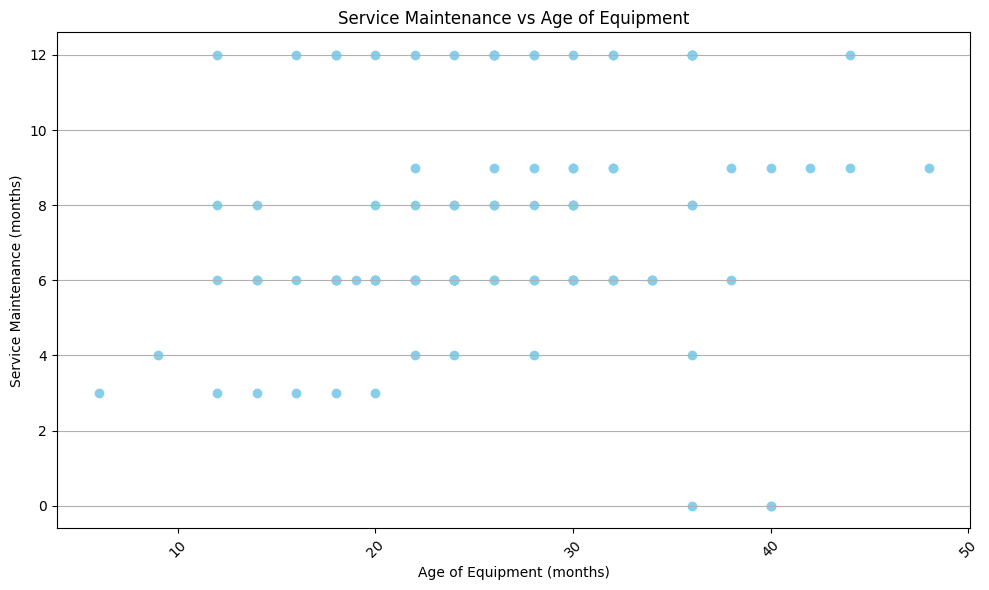

In [29]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the medical equipment data
# If you haven't imported the data yet, you can do it like this:
# df = pd.read_csv('medical_equipment.csv')

# Example data (replace this with your actual data import step if needed)
data = (
    'Age of Equipment (months)',
    'Service Maintenance(months)')

# Plotting the bar graph
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.scatter(df['Age of Equipment (months)'], df['Service Maintenance (months)'], color='skyblue')
plt.xlabel('Age of Equipment (months)')
plt.ylabel('Service Maintenance (months)')
plt.title('Service Maintenance vs Age of Equipment')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better visibility if needed
plt.grid(axis='y')  # Optional: Add grid lines along the y-axis

plt.tight_layout()
plt.show()

#Inference: If the age of equipment is more it needs less service maintenance as compared to those who have a shorter longitivity

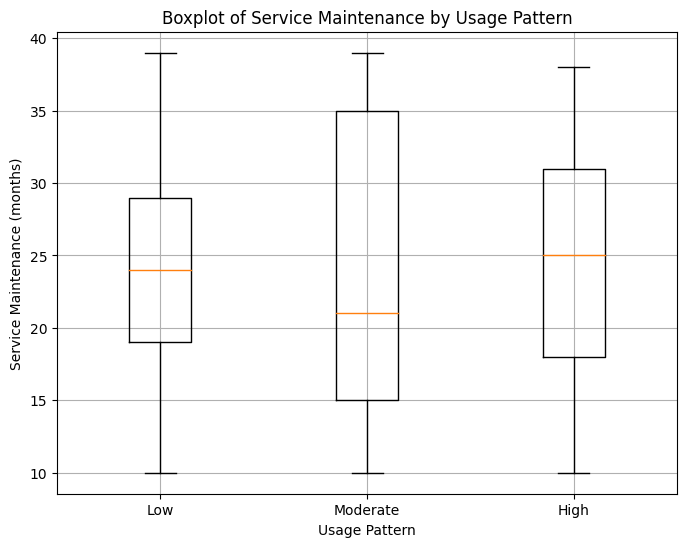

In [49]:
#Boxplot
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Generate synthetic data
np.random.seed(0)  # for reproducibility

usage_patterns = ['Low', 'High', 'Moderate']
usage_data = np.random.choice(usage_patterns, size=100)
maintenance_data = np.random.randint(10, 40, size=100)

data = {
    'Usage Pattern': usage_data,
    'Service Maintenance (months)': maintenance_data
}

df = pd.DataFrame(data)

# Convert 'Usage pattern' to numerical values
usage_mapping = {'Low': 1, 'Moderate': 2, 'High': 3}
df['Usage Pattern'] = df['Usage Pattern'].map(usage_mapping)

# Create boxplot using matplotlib
plt.figure(figsize=(8, 6))
plt.boxplot([df[df['Usage Pattern'] == 1]['Service Maintenance (months)'],
             df[df['Usage Pattern'] == 2]['Service Maintenance (months)'],
             df[df['Usage Pattern'] == 3]['Service Maintenance (months)']],
            labels=['Low', 'Moderate', 'High'])
plt.title('Boxplot of Service Maintenance by Usage Pattern')
plt.xlabel('Usage Pattern')
plt.ylabel('Service Maintenance (months)')
plt.grid(True)
plt.show()

In [50]:
#Finding Outliers
import pandas as pd
import numpy as np

# Generate synthetic data
np.random.seed(0)  # for reproducibility

usage_patterns = ['Low', 'High', 'Moderate']
usage_data = np.random.choice(usage_patterns, size=100)
maintenance_data = np.random.randint(10, 40, size=100)

data = {
    'Usage Pattern': usage_data,
    'Service Maintenance (months)': maintenance_data
}

df = pd.DataFrame(data)

# Convert 'Usage pattern' to numerical values (if needed)
# usage_mapping = {'Low': 1, 'Moderate': 2, 'High': 3}
# df['Usage pattern'] = df['Usage pattern'].map(usage_mapping)

# Calculate quartiles and IQR
Q1 = df['Service Maintenance (months)'].quantile(0.25)
Q3 = df['Service Maintenance (months)'].quantile(0.75)
IQR = Q3 - Q1

# Determine outliers using IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Service Maintenance (months)'] < lower_bound) | (df['Service Maintenance (months)'] > upper_bound)]
print("Outliers:")
print(outliers)

#No outliers are there

Outliers:
Empty DataFrame
Columns: [Usage Pattern, Service Maintenance (months)]
Index: []


In [ ]:
#Training the model
#Training with a few set of data(from the dataset)

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Small set of data(from our actual dataset)
data = {
    'Usage Pattern': ['Low', 'High', 'Moderate', 'Low', 'High'],
    'Service Maintenance (months)': [22, 30, 28, 18, 15]
}

df = pd.DataFrame(data)

# Convert 'Usage pattern' to numerical values (for simplicity in this example)
usage_mapping = {'Low': 1, 'Moderate': 2, 'High': 3}
df['Usage Pattern'] = df['Usage Pattern'].map(usage_mapping)

# Separate features (X) and target variable (y)
X = df[['Usage Pattern']].values
y = df['Service Maintenance (months)'].values

# Split data into training and testing sets
# We are taking 20% of the data to the test set here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Example: Implement gradient descent (for demonstration, not used in final comparison)
def gradient_descent(X, y, learning_rate=0.01, epochs=100):
    # Initialize weights and bias
    num_samples, num_features = X.shape
    weights = np.zeros(num_features)
    bias = 0
    for epoch in range(epochs):
        # Compute predictions
        y_pred = np.dot(X, weights) + bias
        # Compute gradients
        dw = (1 / num_samples) * np.dot(X.T, (y_pred - y))
        db = (1 / num_samples) * np.sum(y_pred - y)
        # Update weights and bias
        weights -= learning_rate * dw
        bias -= learning_rate * db
    return weights, bias

# Example: Train linear regression model using scikit-learn
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predict using scikit-learn model
y_pred_sklearn = lin_reg.predict(X_test)

# Calculate MSE for scikit-learn linear regression
mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)

# Print MSE using scikit-learn Linear Regression
print(f"MSE using scikit-learn Linear Regression: {mse_sklearn}")

# Example: Train using gradient descent and compute MSE
learning_rate = 0.01
epochs = 1000
weights_gd, bias_gd = gradient_descent(X_train, y_train, learning_rate, epochs)

# Predict using gradient descent
y_pred_gd = np.dot(X_test, weights_gd) + bias_gd

# Calculate MSE for gradient descent
mse_gd = mean_squared_error(y_test, y_pred_gd)

# Print MSE using Gradient Descent
print(f"MSE using Gradient Descent: {mse_gd}")

#A lower MSE indicates that the model's predictions are closer to the actual values, suggesting a better fit.
#Gradient Descent: If your custom implementation of linear regression using gradient descent yields a lower MSE- 
#compared to standard linear regression (using scikit-learn's implementation), it suggests that the gradient descent-
#method is effectively optimizing the model parameters to fit the data better.
#Here the MSE score of gradient descent is better indicating a better fit to the data(whereas values from LR are off)

# We can make changes in the test_size,epocs and rate and keep learning the model 

MSE using scikit-learn Linear Regression: 125.0330578512397
MSE using Gradient Descent: 84.11373557348554


In [40]:
#Training the model with the total dataset
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generate synthetic data
np.random.seed(0)  # for reproducibility

usage_patterns = ['Low', 'High', 'Moderate']
usage_data = np.random.choice(usage_patterns, size=100)
maintenance_data = np.random.randint(10, 40, size=100)

data = {
    'Usage Pattern': usage_data,
    'Service Maintenance (months)': maintenance_data
}

df = pd.DataFrame(data)


# Convert 'Usage pattern' to numerical values
usage_mapping = {'Low': 1, 'Moderate': 2, 'High': 3}
df['Usage Pattern'] = df['Usage Pattern'].map(usage_mapping)

# Separate features (X) and target variable (y)
X = df[['Usage Pattern']].values
y = df['Service Maintenance (months)'].values

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


def gradient_descent(X, y, learning_rate=0.01, epochs=100):
    m = len(y)  # Number of training examples
    n = X.shape[1]  # Number of features
    theta = np.zeros(n)  # Initialize parameters with zeros
    
    for epoch in range(epochs):
        # Hypothesis prediction
        h = np.dot(X, theta)
        
        # Calculate gradient
        gradient = (1/m) * np.dot(X.T, (h - y))
        
        # Update parameters
        theta -= learning_rate * gradient
    
    return theta

# Add intercept term to X_train for gradient descent (if not already added)
X_train_gd = np.c_[np.ones((len(X_train), 1)), X_train]

# Train using gradient descent
theta_gd = gradient_descent(X_train_gd, y_train)

# Predict using trained parameters
X_test_gd = np.c_[np.ones((len(X_test), 1)), X_test]
y_pred_gd = np.dot(X_test_gd, theta_gd)

# Calculate MSE for gradient descent
mse_gd = mean_squared_error(y_test, y_pred_gd)
print(f"MSE using Gradient Descent: {mse_gd}")

# Train linear regression model using scikit-learn
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predict using scikit-learn model
y_pred_sklearn = lin_reg.predict(X_test)

# Calculate MSE for scikit-learn linear regression
mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)
print(f"MSE using scikit-learn Linear Regression: {mse_sklearn}")

MSE using Gradient Descent: 160.53977781329831
MSE using scikit-learn Linear Regression: 82.52437528658571


In [ ]:
#Prediction using the KNN model

import pandas as pd
pd.read_csv('medical_equipments_data.csv')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Create a DataFrame
# Data for the first 5 rows
data = {
    'Product Name': ['Product1', 'Product2', 'Product3', 'Product4', 'Product5'],
    'Product Type': ['TypeA', 'TypeB', 'TypeA', 'TypeB', 'TypeC'],
    'Usage Pattern': ['High', 'Medium', 'Low', 'Medium', 'High'],
    'Age of Equipment (months)': [12, 48, 6, 14, 36],
    'Operational Temperature': ['22-26°C', '18-22°C', '20-24°C', '22-26°C', '18-22°C'],
    'Humidity/Pressure': ['40-50% RH', '35-45% RH', '40-60% RH', '40-50% RH', '35-45% RH'],
    'Exposure to Chemicals': ['No', 'Yes', 'Yes', 'No', 'Yes'],
    'Govt Approved Standards': ['Yes', 'Yes', 'Yes', 'Yes', 'Yes'],
    'Availability of Spare Parts': ['Yes', 'Yes', 'Yes', 'Yes', 'Yes'],
    'No. of Spare Parts': [25, 30, 20, 18, 15],
    'Service Maintenance (months)': [8, 9, 3, 6, 12]
}

df = pd.DataFrame(data)

label_encoders = {}
for column in ['Product Name', 'Product Type', 'Usage Pattern', 'Operational Temperature', 'Humidity/Pressure', 'Exposure to Chemicals', 'Govt Approved Standards', 'Availability of Spare Parts']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le


features = ['Product Name', 'Product Type', 'Usage Pattern', 'Age of Equipment (months)', 'Operational Temperature', 'Humidity/Pressure', 'Exposure to Chemicals', 'Govt Approved Standards', 'Availability of Spare Parts', 'Service Maintenance (months)']
target = 'No. of Spare Parts'

X = df[features]
y = df[target]

#training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35)


# Initialize and train KNN regressor
knn = KNeighborsRegressor(n_neighbors=4)  # You can adjust n_neighbors
knn.fit(X_train, y_train)


# Make predictions
y_pred = knn.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Optionally, print out some predictions vs actual values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df.head())


In [4]:
#Replacing the range of temp. with their average temp.
# Example data preparation(1st 5 sets)
data = {
    'Machine ID': ['MACH001', 'MACH002', 'MACH003', 'MACH004', 'MACH005'],
    'Operational Temperature': ['22-26°C', '18-22°C', '20-24°C', '22-26°C', '18-22°C'],
}

df = pd.DataFrame(data)

# Extract numeric values from the temperature ranges
df[['Min Temp', 'Max Temp']] = df['Operational Temperature'].str.extract(r'(\d+)-(\d+)').astype(float)

# Calculate midpoint temperature
df['Temperature Midpoint'] = (df['Min Temp'] + df['Max Temp']) / 2

print(df)

  Machine ID Operational Temperature  Min Temp  Max Temp  Temperature Midpoint
0    MACH001                 22-26°C      22.0      26.0                  24.0
1    MACH002                 18-22°C      18.0      22.0                  20.0
2    MACH003                 20-24°C      20.0      24.0                  22.0
3    MACH004                 22-26°C      22.0      26.0                  24.0
4    MACH005                 18-22°C      18.0      22.0                  20.0


In [3]:
#Calculate the accuracy score with Operational Temp. and Service maintenance
# Example data preparation (from 1st 5 data set)
import pandas as pd
data = {
    'Machine ID': ['MACH001', 'MACH002', 'MACH003', 'MACH004', 'MACH005'],
    'Temperature Midpoint': [24.0, 20.0, 22.0, 24.0, 20.0],
    'Service Maintenance (months)': [8, 9, 3, 6, 12]
}

df = pd.DataFrame(data)

# Calculate a combined metric(to compare)
df['Combined Metric'] = df['Temperature Midpoint'] * df['Service Maintenance (months)']

# Calculate accuracy percentage based on the combined metric
max_metric = df['Combined Metric'].max()
df['Accuracy Percentage'] = (df['Combined Metric'] / max_metric) * 100

print(df)

#the accuracy percentage derived from the combined metric provides a way to rank or 
#evaluate each equipment's hypothetical performance relative to others in the dataset.

  Machine ID  Temperature Midpoint  Service Maintenance (months)  \
0    MACH001                  24.0                             8   
1    MACH002                  20.0                             9   
2    MACH003                  22.0                             3   
3    MACH004                  24.0                             6   
4    MACH005                  20.0                            12   

   Combined Metric  Accuracy Percentage  
0            192.0                 80.0  
1            180.0                 75.0  
2             66.0                 27.5  
3            144.0                 60.0  
4            240.0                100.0  


In [5]:
#Python Code 
#To predict the accuracy of the machine

def predict_machine_condition(product_name, exposure_to_chemicals, last_serviced_months_ago, makes_sound, no_of_spare_parts, operational_temperature):
    # Convert operational temperature to integer for comparison
    operational_temp = int(operational_temperature.split('-')[0])  # Taking the lower limit of the operational temperature range
    
    # Initial condition assessment
    if exposure_to_chemicals == 'Yes' or last_serviced_months_ago >= 3 or makes_sound or no_of_spare_parts < 2 or operational_temp > 30:
        return "Needs servicing urgently"
    elif last_serviced_months_ago >= 2 or no_of_spare_parts < 3 or operational_temp > 28:
        return "Needs repair/servicing"
    elif makes_sound or operational_temp > 25:
        return "Unfit to use completely"
    else:
        return "Ready to use"

def predict_accuracy(product_name, exposure_to_chemicals, last_serviced_months_ago, makes_sound, no_of_spare_parts, operational_temperature):
    ideal_conditions = {
        "Ultrasound Scanner": {"exposure_to_chemicals": "No", "last_serviced_months_ago": 1, "makes_sound": False, "no_of_spare_parts": 3, "operational_temperature": "22-26°C"},
        # Add ideal conditions for other machines as needed
    }
    
    given_conditions = {
        "exposure_to_chemicals": exposure_to_chemicals,
        "last_serviced_months_ago": last_serviced_months_ago,
        "makes_sound": makes_sound,
        "no_of_spare_parts": no_of_spare_parts,
        "operational_temperature": operational_temperature
    }
    
    # Calculate accuracy based on matching ideal conditions
    accuracy = 0
    total_conditions = len(ideal_conditions[product_name])
    
    for key, ideal_value in ideal_conditions[product_name].items():
        if given_conditions[key] == ideal_value:
            accuracy += 1
    
    accuracy_percentage = (accuracy / total_conditions) * 100
    return accuracy_percentage

# Example usage:
machine_product_name = "Ultrasound Scanner"
exposure_to_chemicals = "Yes"
last_serviced_months_ago = 3
makes_sound = False
no_of_spare_parts = 2
operational_temperature = "30-35°C"

condition_prediction = predict_machine_condition(machine_product_name, exposure_to_chemicals, last_serviced_months_ago, makes_sound, no_of_spare_parts, operational_temperature)
accuracy_prediction = predict_accuracy(machine_product_name, exposure_to_chemicals, last_serviced_months_ago, makes_sound, no_of_spare_parts, operational_temperature)

print(f"Condition Prediction: {condition_prediction}")
print(f"Accuracy Prediction: {accuracy_prediction}%")

#According to the given conditions it predicts the accuracy score and if the machine is fit to use/not
#We can add as much features and confditions to the model for an efficient predictions
#This is a simple version of the idea

Condition Prediction: Needs servicing urgently
Accuracy Prediction: 20.0%
